<a href="https://colab.research.google.com/github/meghnakaintura12/mid-term-/blob/main/MID_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.0 import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')



In [ ]:
# 2.1 Read Driving data such as acc,turns

path ="/gdrive/MyDrive/Colab_data_files/deeplearning/"



In [ ]:
# 2.2
data = pd.read_csv("/gdrive/MyDrive/deeplearning/test_motion_data.csv")
#pd.read_csv(path + "test_motion_data.csv")  /Colab_data_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 2.2.1
data.head()

In [ ]:
# 2.2.2
data.shape   # (10000, 14)

In [ ]:
data['Class'].unique()

In [ ]:
data['Class'] = data['Class'].map({'AGGRESSIVE' : 0, 'NORMAL' : 1, 'SLOW' : 2})

In [ ]:
# 2.3 Pop out target
y = data.pop('Class')

In [ ]:
# 2.3.1
data.shape

In [ ]:
# 3.0 Check NULL
data.isnull().sum()

In [ ]:
# 3.1 Test and train split
X_train,X_test, y_train,y_test = train_test_split(data, y, test_size = 0.25)

In [ ]:
X_train.shape
X_test.shape

In [ ]:
y.shape

In [ ]:
# 4.0 Scaling
mm = MinMaxScaler()
mm.fit(X_train)

In [ ]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

## Model

In [ ]:
# 6.0 Blank model
model = tf.keras.Sequential()

In [ ]:
# 6.1 input layer
model.add(tf.keras.layers.Input(shape=(7,)))

In [ ]:
# 6.2 Hidden layer 1
model.add(tf.keras.layers.Dense(150, activation = 'tanh'))

In [ ]:
# 6.3 Hidden layer 2
model.add(tf.keras.layers.Dense(200, activation = 'tanh'))

In [ ]:
# 6.4 Hidden layer 3
model.add(tf.keras.layers.Dense(100, activation = 'tanh'))

In [ ]:
# 6.5 output layer
 model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
# 7.0 model summary
model.summary()



In [ ]:
# 7.0 plot
from tensorflow.keras.utils import plot_model

In [ ]:
# 7.1 plot model
plot_model(model, show_shapes=True)

In [ ]:
# 8.0 compile
model.compile(
                 loss = 'binary_crossentropy',
                 optimizer = 'adam',  # Try first with default optimizer and then with 'adam'
                                      #  may not make much difference
                 metrics = ['acc']
              )

In [ ]:
# 9.0
history = model.fit(X_train,y_train,
                    epochs = 500,
                    validation_data = (X_test, y_test)
                   )

In [ ]:
# 9.1
model.evaluate(X_test,y_test)

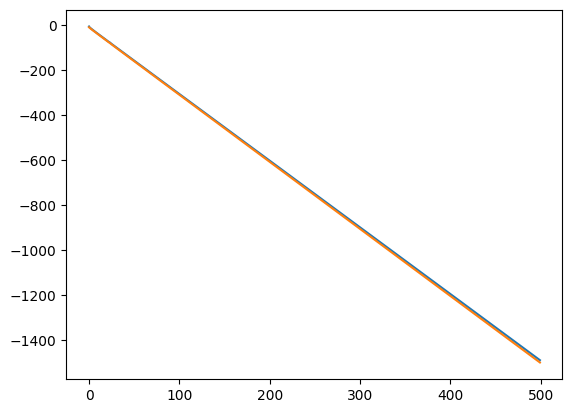

In [ ]:
# 10.0 Plot
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)